In [1]:
from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=40)
cluster

distributed.scheduler - INFO - Clear task state
/srv/conda/envs/notebook/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)
distributed.scheduler - INFO -   Scheduler at:    tcp://10.32.5.59:36149
distributed.scheduler - INFO -   dashboard at:                    :41329


In [2]:
import warnings
warnings.filterwarnings("ignore")
import dask 
import numpy as np
import xarray as xr
import time
import numpy.ma as ma
import matplotlib.cm as mplcm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import os 
import time 
import glob
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

import zarr

%matplotlib inline


distributed.scheduler - INFO - Register tcp://10.32.45.15:34459
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.45.15:34459
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.8.13:42579
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.8.13:42579
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.6.11:44761
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.6.11:44761
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.6.12:39553
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.6.12:39553
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.8.14:45499
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.8.14:45499
distributed.core - IN

In [3]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["sea_surface_height"].to_dask()

distributed.scheduler - INFO - Register tcp://10.32.7.15:34845
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.7.15:34845
distributed.core - INFO - Starting established connection


In [4]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 8901)
Coordinates:
    crs        int32 ...
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(5, 720, 2), meta=np.ndarray>
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
    lon_bnds   (longitude, nv) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2017-05-15
Data variables:
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(5, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2014-02-26T16:09:13Z
    date_issued:                     2014-01-06T00:00:00Z
    date_modified:                   2015-11-10T19:42:51Z
    geospatial_lat_max:              89.875
    geospatial_lat_min:              -89.875
    geospatial_lat_resolution:       0.25
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.875
    geospatial_lon_min:              0.125
    geospatial_lon_resolution:       0.25
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2014-02-26T16:09:13Z: created by DUACS D...
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        ERS-1, Topex/Poseidon
    processing_level:                L4
    product_version:                 5.0
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    source:                          Altimetry measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

In [5]:
aviso_year = ds.sel(time=slice('2009-06-30','2010-10-29'))
myadt = aviso_year.adt
rms_ssh = myadt.std(dim='time')
aviso_mssh = myadt.mean(dim='time') - myadt.mean()


In [6]:
cat2 = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
ds2  = cat2["eNATL60_BLBT02_SSH"].to_dask()

In [7]:
ds2

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 11688, x: 8354, y: 4729)
Coordinates:
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(240,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2010-01-19T00:30:00 ... 2009-09-17T23:30:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    nav_lat               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(240, 480), meta=np.ndarray>
    sossheig              (time_counter, y, x) float32 dask.array<chunksize=(240, 240, 480), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(240, 2), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    TimeStamp:    24/03/2019 14:43:29 +0100
    description:  ocean T grid variables
    file_name:    eNATL60-BLBT02X_1h_20100101_20100125_gridT-2D_20100119-2010...
    ibegin:       0
    jbegin:       0
    name:         /scratch/tmp/5251284/eNATL60-BLBT02X_1h_20100101_20100125_g...
    ni:           8354
    nj:           10
    timeStamp:    2019-Mar-24 06:31:35 GMT
    title:        ocean T grid variables
    uuid:         80877374-74d2-468e-9fc6-d8cae8009094

In [8]:
ds_sorted=ds2.sortby('time_counter')


In [9]:
ssh_eNATL60=ds_sorted.sossheig

In [10]:
ssh_eNATL60_1d_2009=ssh_eNATL60.sel(time_counter=slice('2009-06-30','2009-12-31')).groupby('time_counter.dayofyear').mean(dim='time_counter')
ssh_eNATL60_1d_2010=ssh_eNATL60.sel(time_counter=slice('2010-01-01','2010-10-29')).groupby('time_counter.dayofyear').mean(dim='time_counter')


In [11]:
ssh_eNATL60_1d=xr.concat([ssh_eNATL60_1d_2009,ssh_eNATL60_1d_2010],dim='dayofyear')

In [12]:
std_ssh_eNATL60=ssh_eNATL60_1d.std(dim='dayofyear')

distributed.scheduler - INFO - Register tcp://10.32.43.16:34887
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.43.16:34887
distributed.core - INFO - Starting established connection


In [13]:
mean_ssh_eNATL60=ssh_eNATL60_1d.mean(dim='dayofyear')-ssh_eNATL60.mean()

distributed.scheduler - INFO - Register tcp://10.32.36.11:33181
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.36.11:33181
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.7.16:44973
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.7.16:44973
distributed.core - INFO - Starting established connection


In [14]:
catg = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/MEOM-NEMO.yaml")
dsg  = catg["eNATL60_grid"].to_dask()

In [15]:
dsg

<xarray.Dataset>
Dimensions:       (t: 1, x: 8354, y: 4729, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ff            (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdept_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdept_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    gdepu         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepv         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    glamf         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamt         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    isfdraft      (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    tmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    tmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    umaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    vma

In [17]:
rms_ssh.load()

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875

In [18]:
aviso_mssh.load()

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    crs        int32 -2147483647
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * longitude  (longitude) float32 0.125 0.375 0.625 ... 359.375 359.625 359.875

Text(0.75, 0.25, 'AVISO')

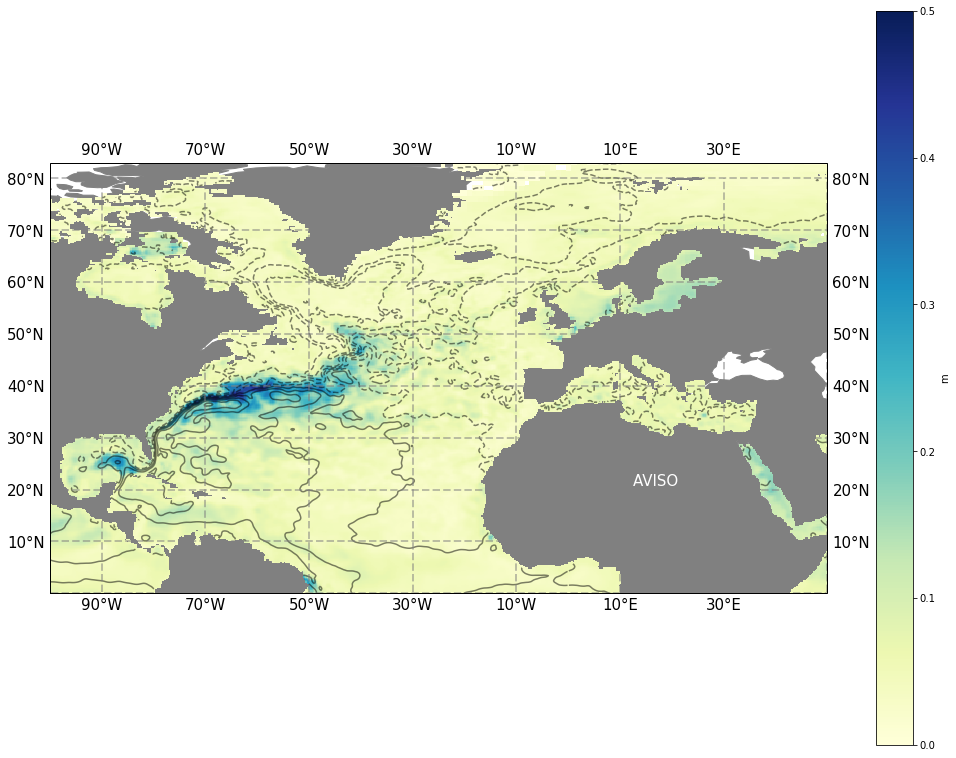

In [19]:
fig=plt.figure(figsize=(20,18))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([-100, 50, 0, 65])

pcolor=ax.pcolormesh(ds.longitude,ds.latitude,rms_ssh,transform=ccrs.PlateCarree(),cmap=mplcm.YlGnBu,vmin=0,vmax=0.5)

contour=ax.contour(ds.longitude,ds.latitude,aviso_mssh,np.arange(-1,1,0.15),colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)

ax.add_feature(cfeature.LAND,facecolor='grey')
#ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.xlabels_top = False
#gl.ylabels_left = False

cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='m')
ax.text(0.75, 0.25, 'AVISO',fontsize=15, color='white', transform=ax.transAxes)
#ax.set_title('AVISO',size=15,y=1.05)


In [ ]:
std_ssh_eNATL60.load()

In [ ]:
mean_ssh_eNATL60.load()

distributed.scheduler - INFO - Register tcp://10.32.35.15:46235
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.35.15:46235
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.9.12:34963
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.9.12:34963
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.45.16:39523
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.45.16:39523
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.36.12:34837
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.36.12:34837
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.9.11:43501
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.9.11:43501
distributed.core 

KeyboardInterrupt: 

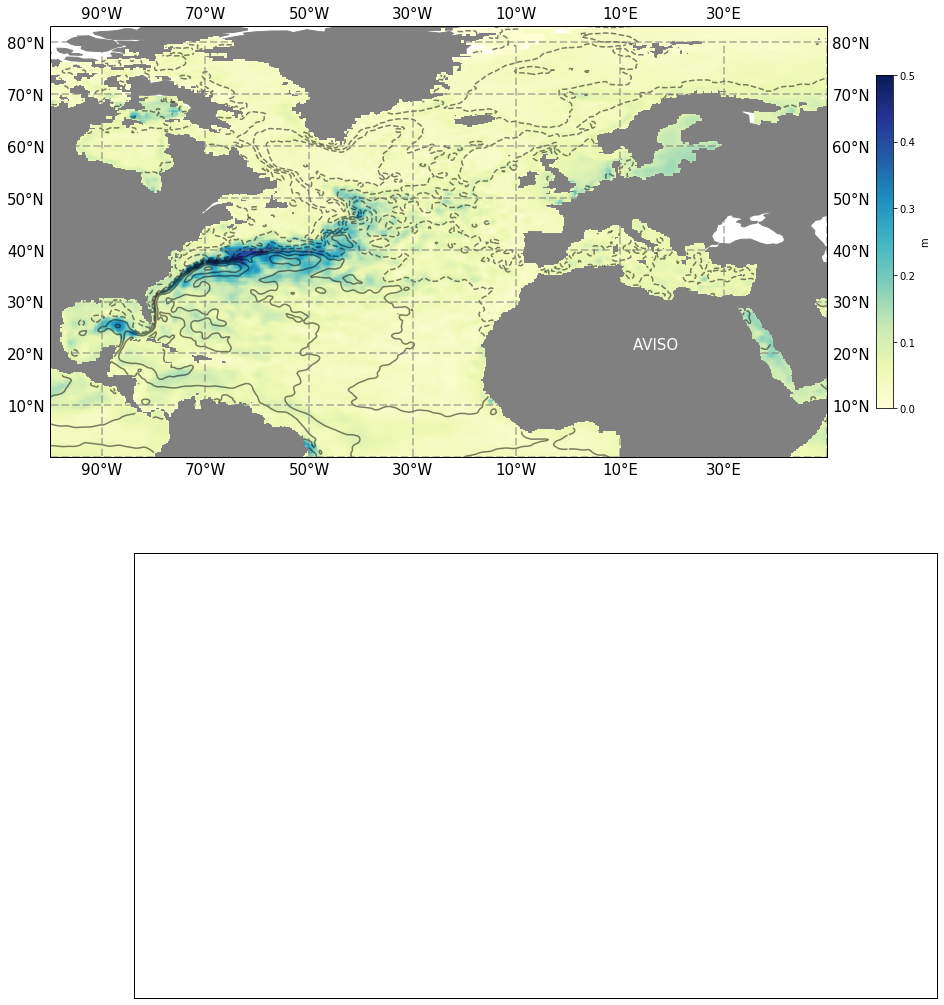

In [16]:
fig=plt.figure(figsize=(20,18))

ax = fig.add_subplot(212,projection=ccrs.PlateCarree(central_longitude=-30))
ax.set_extent([-100, 50, 0, 65])

mask=np.squeeze(dsg.tmaskutil[0])
data_ma=np.ma.masked_where(1-mask,std_ssh_eNATL60)
pcolor=ax.pcolormesh(dsg.nav_lon,dsg.nav_lat,data_ma,transform=ccrs.PlateCarree(),cmap=mplcm.YlGnBu,vmin=0,vmax=0.5)

data_ma=np.ma.masked_where(1-mask,mean_ssh_eNATL60)

contour=ax.contour(grid_eNATL6O.nav_lon, grid_eNATL6O.nav_lat,data_ma,np.arange(-1,1,0.15),transform=ccrs.PlateCarree(),colors='k',alpha=0.5,linewidth=0.0001,antialiased=True)

ax.add_feature(cfeature.LAND,facecolor='grey')
#ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.xlabels_top = False
#gl.ylabels_left = False

cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75,label='m')
ax.text(0.75, 0.25, 'eNATL60',fontsize=15, color='white',transform=ax.transAxes)
#ax.set_title('eNATL60',size=15,y=1.05)


#plt.suptitle('Standart deviation of SSH over 30/06/2009-30/10/2010 period, contours = Mean SSH',size=18,y=0.95,x=0.45)

#plt.savefig('std-mean-SSH-AVISO-eNATL60-BLBT02_no-titles.png',bbox_inches='tight',dpi=300)